In [1]:
import math
import warnings

import entwiner
import unweaver

import geopandas as gpd
import plotnine as p
from shapely.geometry import box, shape, Point

# Suppress warnings, mostly from plotnine
warnings.filterwarnings('ignore')

NAD83 = 26910

In [2]:
landmass = gpd.read_file("../artifacts/seattle_landmasses.geojson")
print(landmass.crs)
#landmass = landmass.to_crs(26910)

reach_metrics = gpd.read_file("../data/reach_metrics.gpkg")
reach_metrics = reach_metrics.to_crs(NAD83)

BOUNDS = reach_metrics.total_bounds

epsg:26910


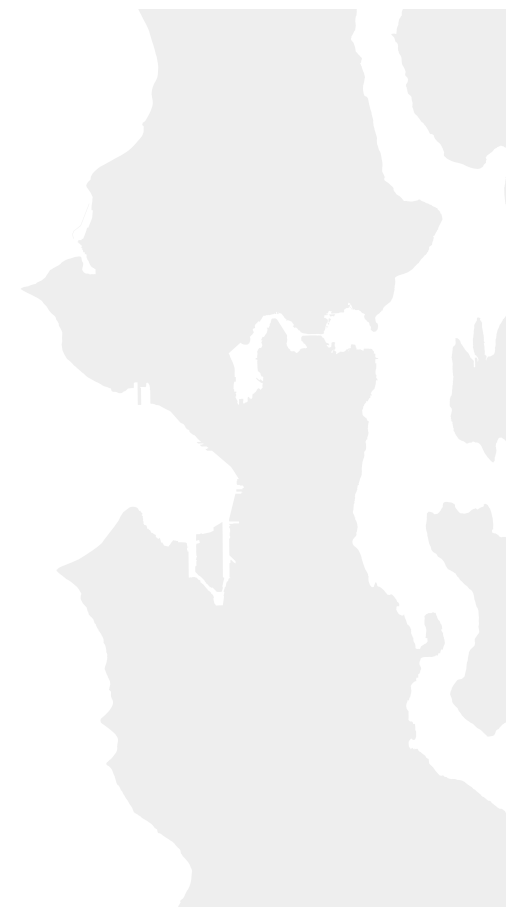

<ggplot: (8774466116919)>

In [3]:
def base_plot():
    plot = (
        p.ggplot(landmass)
        + p.geom_map(color=None, fill="#EEEEEE")
        + p.xlim(BOUNDS[0], BOUNDS[2])
        + p.ylim(BOUNDS[1], BOUNDS[3])
        + p.coord_fixed()
        + p.theme_void()
        + p.theme(panel_background=p.element_rect(fill="#ffffff"))
    )
    return plot

base_plot()

In [4]:
def plot_lines(gdf, color_aes, scale_color_kwargs=None):
    if scale_color_kwargs is None:
        scale_color_kwargs = {}
    
    plot = base_plot()
    plot += p.geom_map(p.aes(color=color_aes), data=reach_metrics)
    # plot += p.geom_map(data=reach_metrics)
    # plot += p.scale_color_cmap(name="viridis", **scale_color_kwargs)
    
    return plot

In [5]:
reach_metrics["nsr_walk"].describe()

count    47185.000000
mean         0.498584
std          0.348944
min          0.000000
25%          0.117152
50%          0.600613
75%          0.780359
max          1.521818
Name: nsr_walk, dtype: float64

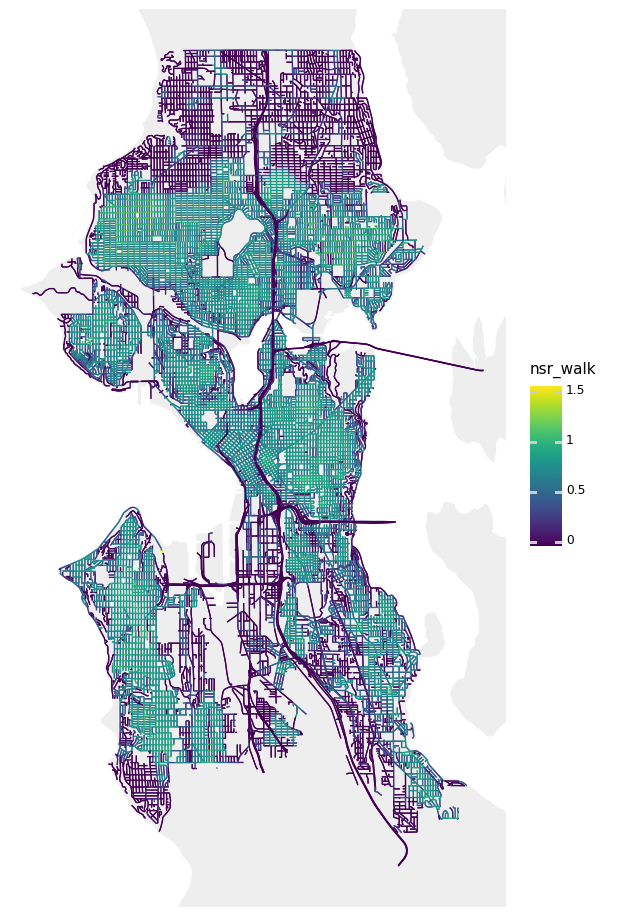

<ggplot: (8774446243904)>

In [6]:
plot = plot_lines(
    reach_metrics,
    "nsr_walk",
    scale_color_kwargs={"limits": (0, 1)}
)
plot.save("../artifacts/figures/Fig4/figure_nsr_normative.png", dpi=180)
plot.save("../artifacts/figures/Fig4/figure_nsr_normative.svg", dpi=180)
plot

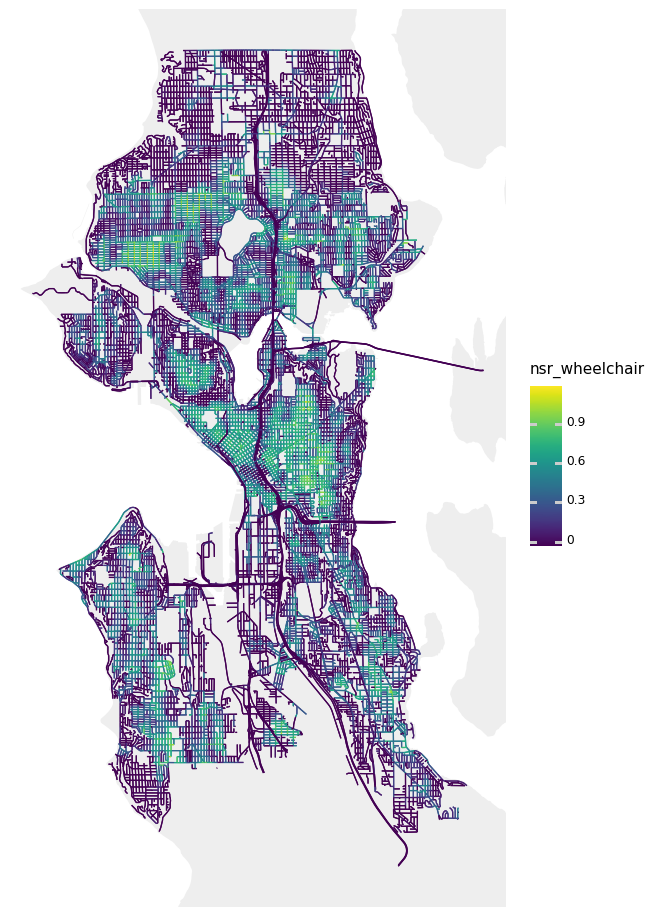

<ggplot: (8774443853547)>

In [7]:
plot = plot_lines(
    reach_metrics,
    "nsr_wheelchair",
    scale_color_kwargs={"limits": (0, 1)}
)
plot.save("../artifacts/figures/Fig4/figure_nsr_wheelchair.png", dpi=180)
plot.save("../artifacts/figures/Fig4/figure_nsr_wheelchair.svg", dpi=180)
plot